In [449]:
import seaborn as sns
import pandas as pd

In [450]:
dataset=sns.load_dataset("titanic")

In [451]:
dataset.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [452]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [453]:
dataset["sex"].value_counts(),dataset["deck"].value_counts()

(sex
 male      577
 female    314
 Name: count, dtype: int64,
 deck
 C    59
 B    47
 D    33
 E    32
 A    15
 F    13
 G     4
 Name: count, dtype: int64)

In [454]:
dataset["embarked"].value_counts(),dataset["class"].value_counts()

(embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64,
 class
 Third     491
 First     216
 Second    184
 Name: count, dtype: int64)

In [455]:
dataset["adult_male"].value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [456]:
#handling string value or categorical value
from sklearn.impute import SimpleImputer
s=SimpleImputer(strategy="most_frequent")
dataset[["embark_town","deck","embarked"]]=s.fit_transform(dataset[["embark_town","deck","embarked"]])

In [457]:
ss=SimpleImputer()
dataset[["age"]]=ss.fit_transform(dataset[["age"]])

In [458]:
dataset.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [459]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [460]:
ordinal=OrdinalEncoder(categories=[["male","female"],
                                   ["Southampton","Cherbourg","Queenstown"],
                                  ["First","Second","Third"],
                                  ["no","yes"],
                                  ["man","woman","child"],
                                  ["S","C","Q"]])
dataset["adult_male"] = dataset["adult_male"].astype(int) # contain duplicate value


In [461]:
dataset[['sex', 'embark_town',"class","alive","who","embarked"]]=ordinal.fit_transform(dataset[["sex","embark_town","class","alive","who","embarked"]])


In [462]:
one_hotencoder=OneHotEncoder(sparse_output=False)
column=dataset["deck"].unique()
d1=one_hotencoder.fit_transform(dataset[["deck"]])
d1=pd.DataFrame(d1,columns=column)

In [463]:
dataset=dataset.drop(columns=["deck"])

In [464]:
dataset=pd.concat([dataset,d1],axis=1)

In [465]:
l=LabelEncoder()

In [466]:
dataset["alone"]=l.fit_transform(dataset["alone"])

In [467]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,C,E,G,D,A,B,F
0,0,3,0.0,22.0,1,0,7.2500,0.0,2.0,0.0,...,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1.0,38.0,1,0,71.2833,1.0,0.0,1.0,...,1.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,3,1.0,26.0,0,0,7.9250,0.0,2.0,1.0,...,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,1.0,35.0,1,0,53.1000,0.0,0.0,1.0,...,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,3,0.0,35.0,0,0,8.0500,0.0,2.0,0.0,...,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [468]:
x=dataset.drop(columns=["alive"])
x.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,C,E,G,D,A,B,F
0,0,3,0.0,22.0,1,0,7.2500,0.0,2.0,0.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1.0,38.0,1,0,71.2833,1.0,0.0,1.0,0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [469]:
y=dataset["alone"]
y.value_counts()

alone
1    537
0    354
Name: count, dtype: int64

In [470]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((668, 20), (223, 20), (668,), (223,))

In [471]:
from sklearn.tree import DecisionTreeClassifier

In [472]:
d=DecisionTreeClassifier()

In [473]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [474]:
d.score(x_train,y_train)

1.0

In [475]:
y_predict=d.predict(x_test)

In [476]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)


1.0

In [477]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       131

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [478]:
c=confusion_matrix(y_test,y_predict)
c

array([[ 92,   0],
       [  0, 131]], dtype=int64)

<Axes: >

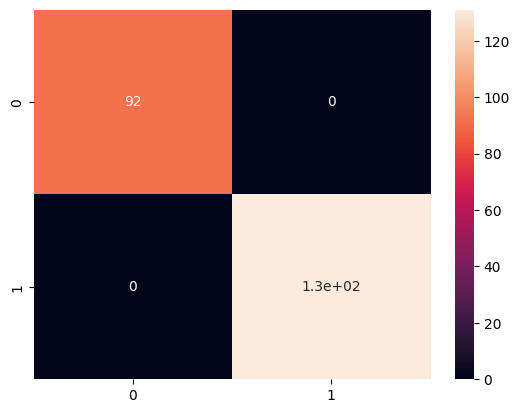

In [479]:
sns.heatmap(c,annot=True)


In [428]:
import numpy as np

In [439]:
def predict_value(x_input):
    

    x_input=np.asarray(x_input)
    x_input=x_input.reshape(1,-1)
    predict=d.predict(x_input)
    return predict
    

In [493]:

print(predict_value(x_train.iloc[1]))

[1]


C:\Users\wwrao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [494]:
print(predict_value(x_train.iloc[2]))

[0]


C:\Users\wwrao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [495]:
print(predict_value(x_train.iloc[3]))

[1]


C:\Users\wwrao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [497]:
print(predict_value(x_train.iloc[100]))

[1]


C:\Users\wwrao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
